# <b><span style="color:red">Generating synthetic Images</span></b>

#### This notebook creates synthetic font images similar to the given data 

In [1]:
from PIL import Image, ImageDraw, ImageFont
import os
import random
from tqdm import tqdm
import shutil
import os
import matplotlib.pyplot as plt
random.seed(42)
dataset_path=(os.path.join('../project_files','data'))
project_path = os.path.join('../project_files')

In [2]:
#method to get all the font classes 
def get_folder_names():
    folder_names = []
    for root, dirs, files in os.walk(dataset_path):
        for dir in dirs:
            folder_names.append(dir)
    return folder_names

#method to get the number of characters in the image given the width
def get_num_chars(width):
    """
    Given the width of the image, return the number of characters that can fit in the image.
    The relationship between the width and the number of characters is approx linear (as found in the text_exploration.ipynb file)
    with some random noise added to it.
    
    """
    num_chars=(width//22)+random.randint(-2,2)
    return max(5,num_chars)


def generate_string(number_characters):
    """
    Generate a string of random words that is less than or equal to the number of characters.
    The words are selected from the google-10000-english-preprocessed.txt file
    """
    result = ''
    #shuffle the words
    random.shuffle(words)
        
    while len(result) < number_characters:
            random_word = random.choice(words)
            if len(result) + len(random_word) <= number_characters:
                result += random_word + ' '
            else:
                if abs(len(result) + len(random_word) - number_characters) < 3:
                    break
                else:
                    random_word = random.choice([word for word in words if len(word) <= (number_characters - len(result))])
                    result += random_word + ' '
                
    return result.strip()


In [3]:
#fetching the words from the file

file_path = os.path.join(project_path, 'google-10000-english-preprocessed.txt')
with open(file_path, 'r') as file:
    words = file.read().splitlines()

In [4]:
def generate_sample_font_images(font_name,num_samples):
    """
    Generate the synthetic images for the given font name.
    First the ttf file is loaded for the corresponding font name.
    For each image (num_samples) images are created.
    The width and height of the generated image is the same as the original image.
    Using the width of the image, the number of characters that can fit in the image is calculated.
    A random string of words is generated that is less than or equal to the number of characters.
    The font size is calculated such that the text fits in the image.
    The text is drawn on the image after appropriate scalling and positioning.
    Finally the image is saved in the synthetic_train folder.
    """
    print('Generating synthetic data for :',font_name)
    font_data_folder=os.path.join(dataset_path,font_name)
    font_path = os.path.join(project_path,'fonts',font_name+'.ttf')
    
    #get all the files in the folder with absolute path
    font_files=[os.path.join(font_data_folder,font_file) for font_file in os.listdir(font_data_folder)]
    font_size=72
    #iterate over all the files
    for font_file in (font_files[:1]):
        #print('Processing:',font_file)
        img = Image.open(font_file)
        width, height = img.size
        #save the cuurent file
        new_path=font_file.replace('data','synthetic_data_sample')
        #print('Saving to:',new_path)
        #saving the original image
        #img.save(new_path)
    
        # #generate num_samples images for each font file
        for i in range(num_samples):
            font = ImageFont.truetype(font_path, font_size)
            num_chars=get_num_chars(width)
            #generate the text
            text = generate_string(num_chars)
            #draw the text on the image
            image = Image.new("RGB", (width, height), "white")
            draw = ImageDraw.Draw(image)
            text_length = draw.textlength(text, font=font)
            while text_length > width:
                font_size -= 1
                font = ImageFont.truetype(font_path, font_size)
                text_length = draw.textlength(text, font=font)
            font_size+=1
            font = ImageFont.truetype(font_path, font_size)
            text_position = (image.width//2, image.height//2 )
            draw.text(text_position, text, fill="black", font=font,anchor="mm")
            try:
                image.save(new_path.replace('.png',f'_{i}.png'))
            except:
                print('Error saving image for')
                print(font_file)

In [5]:
os.makedirs(os.path.join(project_path,'synthetic_data_sample'),exist_ok=True)
#get all the font names
font_names_list = get_folder_names()
#generate the synthetic images for each font
num_samples=5
for font_name in font_names_list[:]:
    font_path=os.path.join(project_path,'synthetic_data_sample',font_name)
    os.makedirs(font_path,exist_ok=True)
    generate_sample_font_images(font_name,num_samples)
print('Synthetic images generated successfully')

Generating synthetic data for : AlexBrush
Generating synthetic data for : I Love Glitter
Generating synthetic data for : Holligate Signature
Generating synthetic data for : Canterbury
Generating synthetic data for : AguafinaScript
Generating synthetic data for : James Fajardo
Generating synthetic data for : GreatVibes
Generating synthetic data for : Allura
Generating synthetic data for : alsscrp
Generating synthetic data for : OpenSans
Synthetic images generated successfully


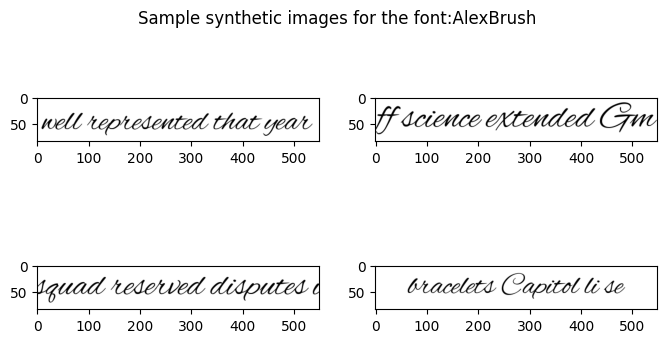

In [6]:
synthetic_data_path=os.path.join(project_path,'synthetic_data_sample')
#display the first four images for the first font
font=font_names_list[0]
font_path=os.path.join(synthetic_data_path,font)
font_files=[os.path.join(font_path,font_file) for font_file in os.listdir(font_path)]
plt.figure(figsize=(8,4))
plt.suptitle('Sample synthetic images for the font:'+font)
for i in range(4):
    img=Image.open(font_files[i])
    plt.subplot(2,2,i+1)
    plt.imshow(img)



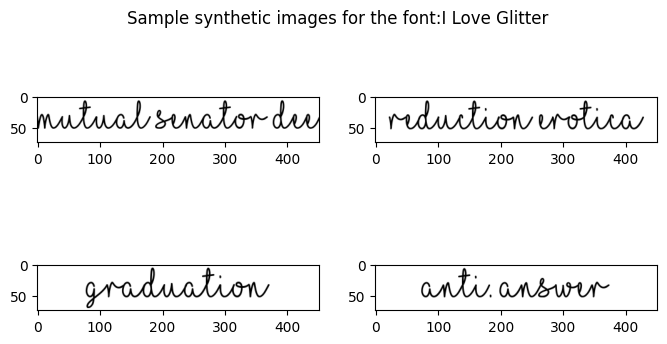

In [7]:
#display the first four images for the second font
font=font_names_list[1]
font_path=os.path.join(synthetic_data_path,font)
font_files=[os.path.join(font_path,font_file) for font_file in os.listdir(font_path)]
plt.figure(figsize=(8,4))
plt.suptitle('Sample synthetic images for the font:'+font)
for i in range(4):
    img=Image.open(font_files[i])
    plt.subplot(2,2,i+1)
    plt.imshow(img)

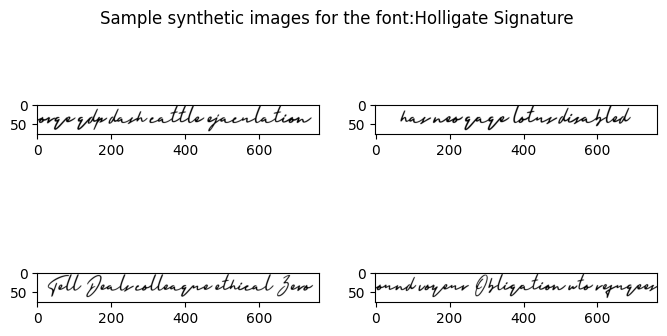

In [8]:
 #display the first four images for the third font
font=font_names_list[2]
font_path=os.path.join(synthetic_data_path,font)
font_files=[os.path.join(font_path,font_file) for font_file in os.listdir(font_path)]
plt.figure(figsize=(8,4))
plt.suptitle('Sample synthetic images for the font:'+font)
for i in range(4):
    img=Image.open(font_files[i])
    plt.subplot(2,2,i+1)
    plt.imshow(img)